,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


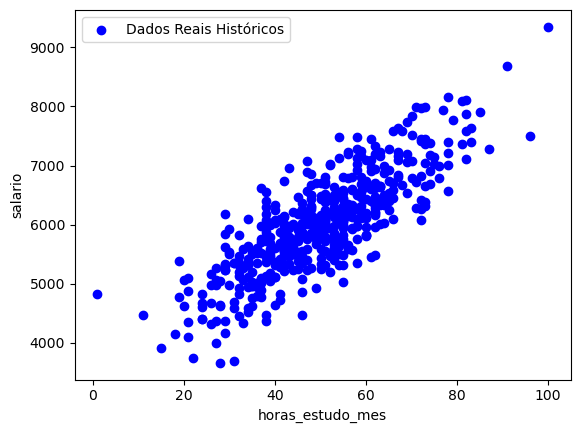

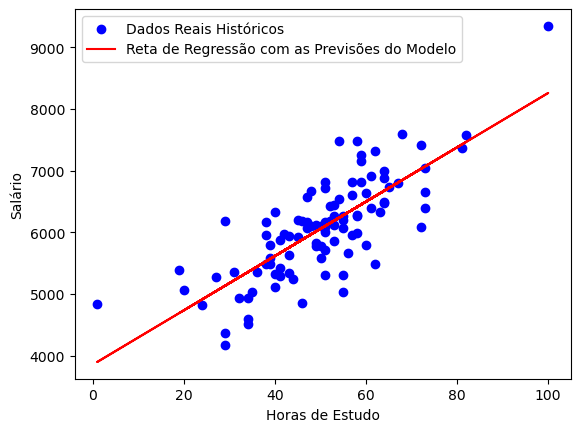

Se você estudar cerca de [48] horas por mês seu salário pode ser igual a 5969.458277524651 reais


TypeError: unhashable type: 'DataFrame'

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Carrega o dataset
df_dsa = pd.read_csv(
    "/home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/Ciencia da Computacao/assets/dataset.csv"
)


class DataScienceAnalises:
    def __init__(self):
        pass

    def analise_inicial(self, df_dsa):
        print(f"Tamanho: {df_dsa.shape}")
        print(f"Colunas: {df_dsa.columns}")
        df_dsa.head()
        print(f"Info: {df_dsa.info()}")
        print(f"Valores ausentes?: {df_dsa.isnull().sum()}")
        print(f"Correlação entre colunas: {df_dsa.corr()}")
        print(f"Analise descritiva simples : {df_dsa.describe()}")

    def histograma_variavel_preditora(self, df, coluna):
        # Histograma da variável preditora
        sns.histplot(data=df, x=coluna, kde=True)


class PredictRegressionLinear:
    def __init__(self):
        self.modelo = LinearRegression()

    def preparar_dados(self, df_dsa, coluna_entrada, coluna_alvo):
        # Prepara a variável de entrada X
        X = np.array(df_dsa[coluna_entrada])

        # Ajusta o shape de X
        X = X.reshape(-1, 1)

        # Prepara a variável alvo
        y = df_dsa[coluna_alvo]

        if type(X) and type(y):
            # print(type(X))
            pass

        X_treino, X_teste, y_treino, y_teste = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        # Gráfico de dispersão entre X e y
        plt.scatter(X, y, color="blue", label="Dados Reais Históricos")
        plt.xlabel(coluna_entrada)
        plt.ylabel(coluna_alvo)
        plt.legend()
        plt.show()

        # print(X_teste.shape, y_teste.shape)
        # print(X_treino.shape, y_treino.shape)

        return X_treino, X_teste, y_treino, y_teste

    def train(self, x, y):
        # Treina o modelo
        self.modelo.fit(x, y)
        self.visualiza_modelo(x, y)

    def avalia_modelo(self, X_teste, y_teste):
        # Avalia o modelo nos dados de teste
        score = self.modelo.score(X_teste, y_teste)
        print(f"Coeficiente R^2: {score:.2f}")

        # Intercepto - parâmetro w0
        print("WO = ", self.modelo.intercept_)

        # Slope - parâmetro w1
        print("W1 = ", self.modelo.coef_)

    def visualiza_modelo(
        self,
        X,
        y,
    ):
        # Visualiza a reta de regressão linear (previsões) e os dados reais usados no treinamento
        plt.scatter(X, y, color="blue", label="Dados Reais Históricos")
        plt.plot(
            X,
            self.modelo.predict(X),
            color="red",
            label="Reta de Regressão com as Previsões do Modelo",
        )
        plt.xlabel("Horas de Estudo")
        plt.ylabel("Salário")
        plt.legend()
        plt.show()

    def deploy(self, x):
        X = np.array([[x]])

        # Faz previsão com o modelo treinado
        y = self.modelo.predict(X)

        print(
            f"Se você estudar cerca de",
            X[0],
            "horas por mês seu salário pode ser igual a",
            y[0],
            "reais",
        )

        return X[0], y[0]


class PrevisaoHorasEstudos:
    def __init__(self):
        self.model = PredictRegressionLinear()


display(df_dsa.head())

meu_modelo = PredictRegressionLinear()
X_treino, X_teste, y_treino, y_teste = meu_modelo.preparar_dados(
    df_dsa, "horas_estudo_mes", "salario"
)

meu_modelo.train(X_teste, y_teste)

valor, predict = meu_modelo.deploy(48)


#df_dsa.loc(df_dsa[["salario"]])

df_dsa["Previsao"] = predict
df_dsa